<a href="https://colab.research.google.com/github/ori112/white-wine-quality-predictions/blob/main/wine_quality_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#reading project file
df = pd.read_csv(r'/content/winequality-white.csv', sep = ';')

In [3]:
#inspecting the df
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#inspecting the features and target types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
#checking for null values
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#inspecting unique values for target label
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [7]:
#preprocessing the quality label to two groups "bad" and "good"
labels = ["bad", "good"]

for index, row in df.iterrows():
    if row["quality"] <= 6:
        df.at[index, "quality"] = labels[0]
    else:
        df.at[index, "quality"] = labels[1]


In [8]:
df.quality.unique()

array(['bad', 'good'], dtype=object)

bad     3838
good    1060
Name: quality, dtype: int64

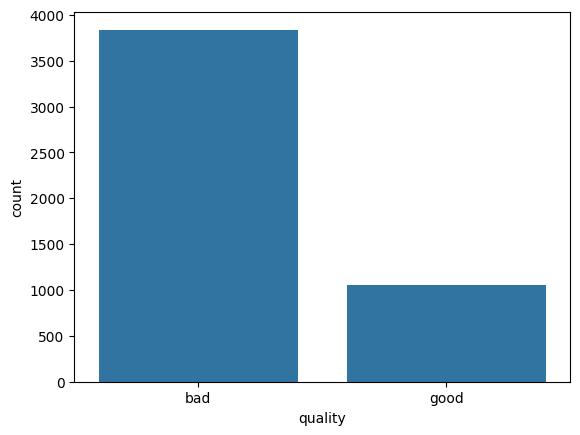

In [9]:
#visualizing the two groups
sns.countplot(data = df, x='quality')
df["quality"].value_counts()

In [10]:
#label encoding
label_enocder = LabelEncoder()
df['quality'] = label_enocder.fit_transform(df['quality'])

0    3838
1    1060
Name: quality, dtype: int64

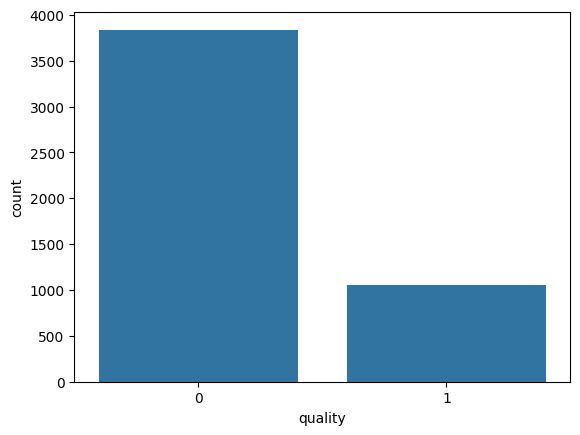

In [11]:
#re-checking labels
sns.countplot(data = df, x='quality')
df["quality"].value_counts()

In [12]:
#creating feature and tartget variables
X = df.drop('quality', axis = 1)
y = df['quality']

In [13]:
#splitting data for trainning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#applying standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# random forest classifier

In [15]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [16]:
#creating predictions
pred_rfc = rfc.predict(X_test)

In [17]:
#printing classification reports
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       753
           1       0.84      0.60      0.70       227

    accuracy                           0.88       980
   macro avg       0.86      0.78      0.81       980
weighted avg       0.88      0.88      0.87       980



In [18]:
#printing confusion matrix
print(confusion_matrix(y_test, pred_rfc))

[[727  26]
 [ 91 136]]


In [19]:
#calculation "good" probabilities
y_score = rfc.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

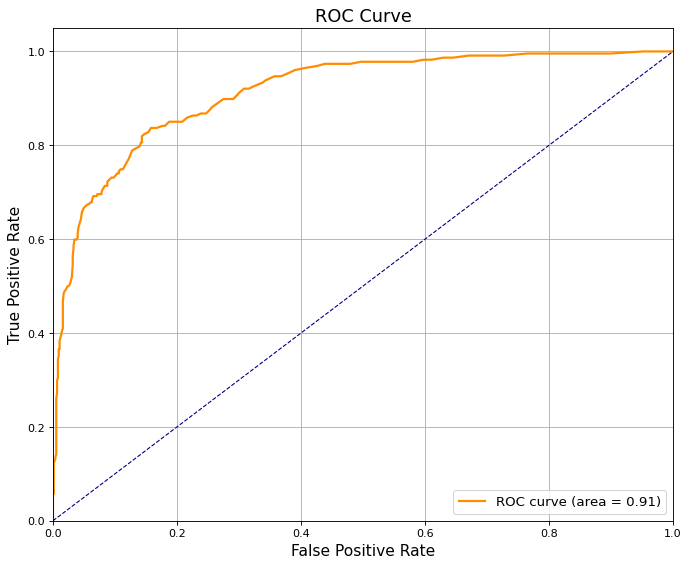

In [20]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# SVM classifier


In [21]:
#intializing svm classifier
svm = svm.SVC(probability=True)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

In [22]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       753
           1       0.75      0.34      0.47       227

    accuracy                           0.82       980
   macro avg       0.79      0.65      0.68       980
weighted avg       0.81      0.82      0.79       980



In [23]:
print(confusion_matrix(y_test, pred_svm))

[[727  26]
 [150  77]]


In [24]:
#calculation "good" probabilities
y_score = svm.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

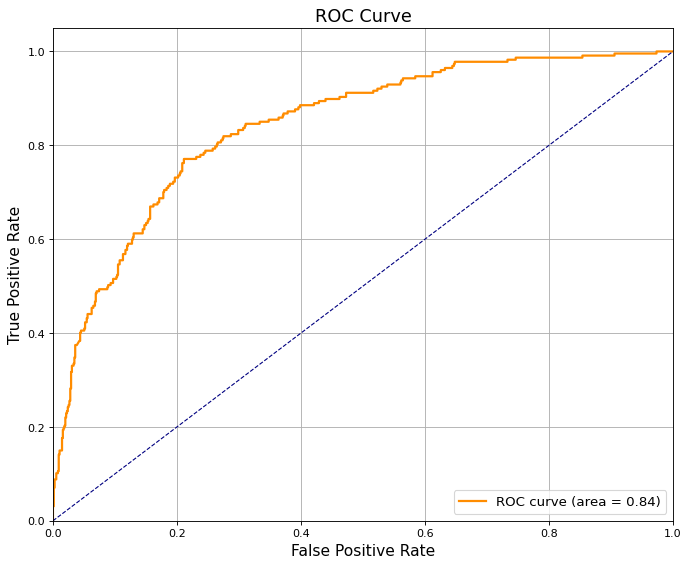

In [25]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# neural network

In [26]:
mlpc = MLPClassifier(hidden_layer_sizes=(20,20,20),max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [27]:
print(classification_report(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       753
           1       0.64      0.62      0.63       227

    accuracy                           0.83       980
   macro avg       0.76      0.76      0.76       980
weighted avg       0.83      0.83      0.83       980



In [28]:
print(confusion_matrix(y_test, pred_mlpc))

[[672  81]
 [ 86 141]]


In [29]:
#calculation "good" probabilities
y_score = mlpc.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

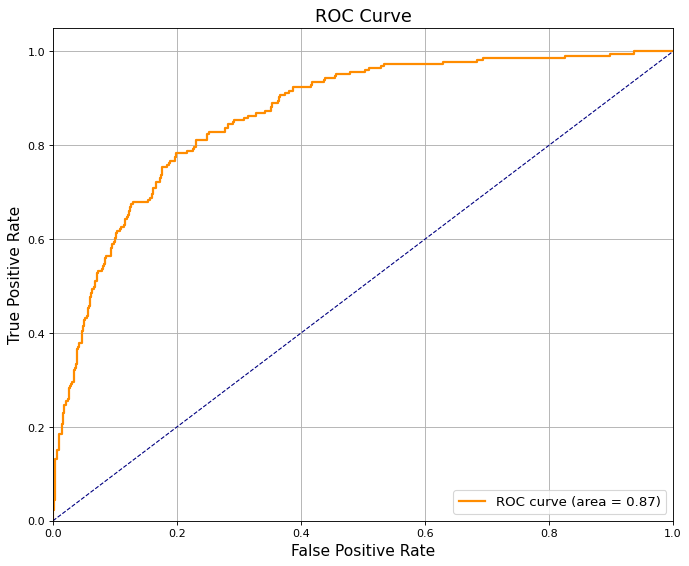

In [30]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [32]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       753
           1       0.68      0.44      0.53       227

    accuracy                           0.82       980
   macro avg       0.76      0.69      0.71       980
weighted avg       0.81      0.82      0.81       980



In [33]:
print(confusion_matrix(y_test, pred_knn))

[[707  46]
 [128  99]]


In [34]:
#calculation "good" probabilities
y_score = knn.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

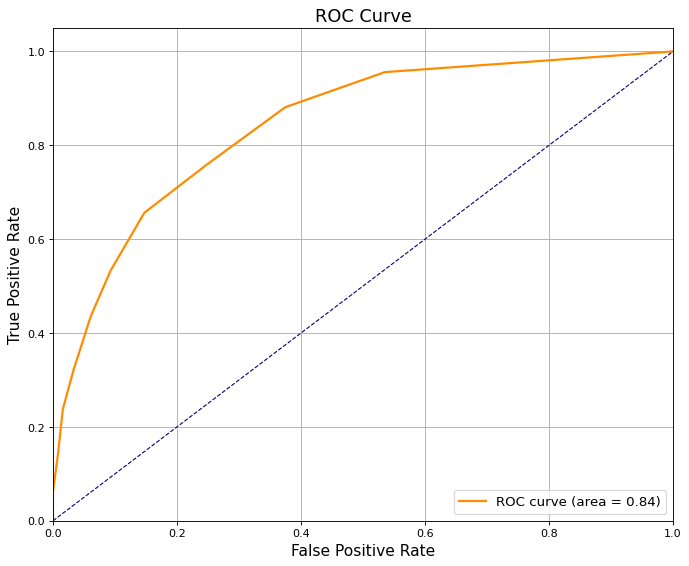

In [35]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# Decision Tree

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train ,y_train)
pred_dtc = dtc.predict(X_test)

In [37]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       753
           1       0.53      0.59      0.56       227

    accuracy                           0.78       980
   macro avg       0.70      0.72      0.71       980
weighted avg       0.79      0.78      0.79       980



In [38]:
print(confusion_matrix(y_test,pred_dtc))

[[633 120]
 [ 92 135]]


In [39]:
#calculation "good" probabilities
y_score = dtc.predict_proba(X_test)[:, 1]

#roc curve and auc computation

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

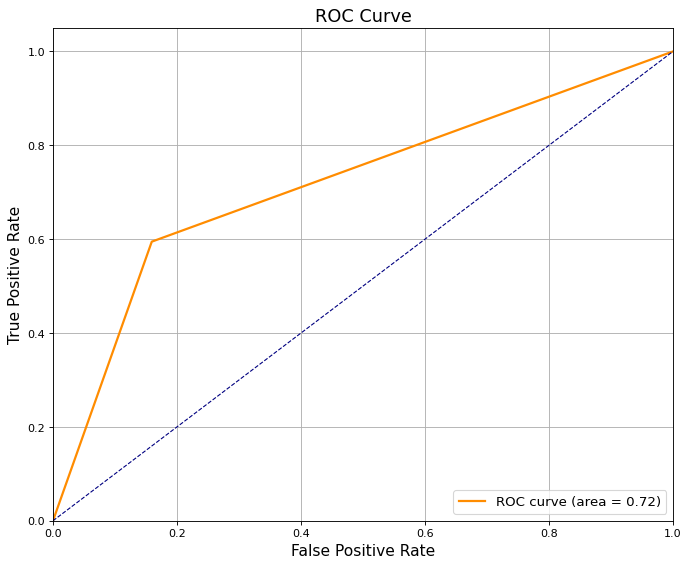

In [40]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# Comparing ROC curves

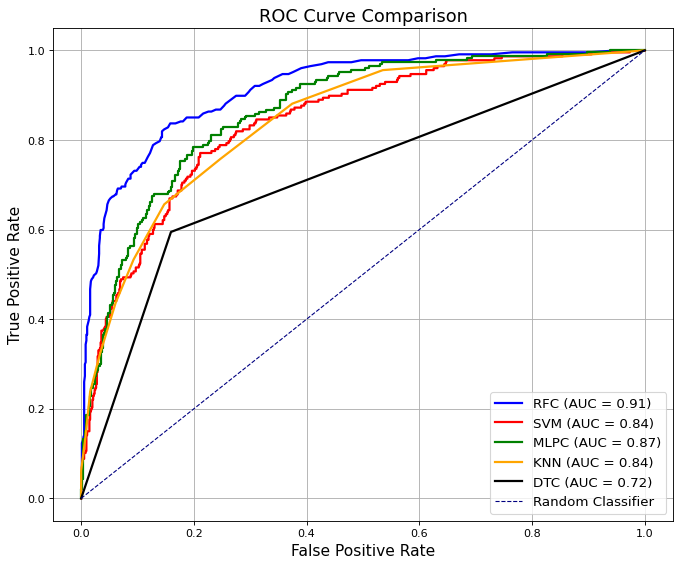

In [42]:
# Compute ROC curve and ROC area for each model

y_score_rfc = rfc.predict_proba(X_test)[:, 1]
y_score_svm = svm.predict_proba(X_test)[:, 1]
y_score_mlpc = mlpc.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_dtc = dtc.predict_proba(X_test)[:, 1]

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_score_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_mlpc, tpr_mlpc, _ = roc_curve(y_test, y_score_mlpc)
roc_auc_mlpc = auc(fpr_mlpc, tpr_mlpc)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_score_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

# Plot ROC curves for each model
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr_rfc, tpr_rfc, color='blue', lw=2, label='RFC (AUC = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_mlpc, tpr_mlpc, color='green', lw=2, label='MLPC (AUC = %0.2f)' % roc_auc_mlpc)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dtc, tpr_dtc, color='black', lw=2, label='DTC (AUC = %0.2f)' % roc_auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Classifier')

# Add labels and legend
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

# Show plot
plt.show()